In [1]:
# Created by GB - 10/22
import numpy as np
import scipy.special as ss
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import random

In [2]:
training_loss = []
validation_loss = []
interval = np.linspace(0,8,100000)
number_of_datas = [10,20,100,1000,2000,3000,4000,5000,7500,9000,10000]
mean = 0
variance = 1
std = np.sqrt(variance)

In [3]:
# This part was coded in K-nn classification
def train_test_split(array1,array2,train_size):
        len_array1 = len(array1)
        len_array2 = len(array2)
        array1_train_size = int(train_size*len_array1)
        array2_train_size = int(train_size*len_array2)
        X_train = array1[:array1_train_size]
        Y_train = array2[:array1_train_size]
        X_test = array1[array2_train_size:]
        Y_test = array2[array2_train_size:]
        return X_train,Y_train,X_test,Y_test

In [4]:
def l2_loss(y_true,y_predicted,number):
    loss = np.sum(np.power((y_true-y_predicted),2))/number
    return loss

In [5]:
def plot_pol(x,y,label):
    plt.title('Bessel - Polynomial Fit')
    plt.scatter(x,y,label=label,s=30)
    plt.xlabel('Interval')
    plt.ylabel('Jn values')
    plt.grid(False)
    plt.legend(loc='best')

In [6]:
#noise
noise=random.gauss(mean,std)/10
noise

0.06262207981463412

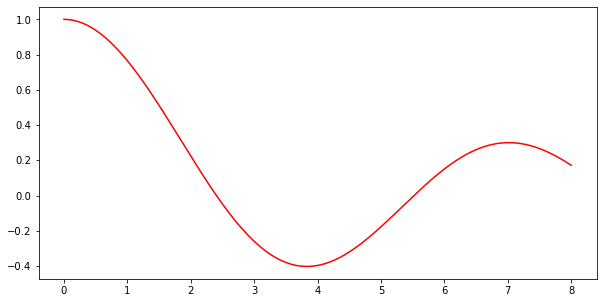

In [7]:
#Bessel function without noise
jn_0 = ss.jn(0,interval)
plt.rcParams['figure.figsize']=[10,5]
plt.plot(interval,jn_0,color='r')

In [8]:
jn_0[0]

1.0

In [9]:
# Finding x and y values of bessel function
# Note that, the jn_0 value in this code is not the exact solution for bessel
# The solution has some noises, therefore, it differs than exact solution
random_choice_interval = np.random.choice(interval,1)
random_choice_interval
index = np.where(interval==random_choice_interval)
index
jn_0[index]

array([0.99777713])

In [10]:
random_choice_interval

array([0.09432094])

# Polynomial Fit

In [11]:
l2_loss_train_list = []
l2_loss_val_list = []
for number in number_of_datas:
    print(number)
    model = LinearRegression()
    sub_list_x = []
    sub_list_y = []
    for _ in range(number):
        noise=random.gauss(mean,std)/10
        random_choice_interval = np.random.choice(interval,1)
        sub_list_x.append(random_choice_interval)
        index = np.where(interval==random_choice_interval)
        sub_list_y.append(jn_0[index]+noise)
    x_train,y_train,x_test,y_test = train_test_split(sub_list_x,sub_list_y,0.8)
    polf = PolynomialFeatures(8)
    x_pol = polf.fit_transform(x_train)
    model.fit(x_pol,y_train)
    y_pred_train = model.predict(polf.fit_transform(x_train))
    y_pred_val = model.predict(polf.fit_transform(x_test))
    l2_loss_train = l2_loss(y_train,y_pred_train,len(y_train))
    l2_loss_val = l2_loss(y_test,y_pred_val,len(y_test))
    l2_loss_train_list.append(l2_loss_train)
    l2_loss_val_list.append(l2_loss_val)
    #plot_pol(x_test,y_test,'Actual data')
    #plot_pol(x_test,y_pred_val, 'Predicted data')
    

10
20
100
1000
2000
3000
4000
5000
7500
9000
10000


In [12]:
for i in range(len(number_of_datas)):
    print('L2 loss of training set with {} datas is: '.format(number_of_datas[i]),l2_loss_train_list[i] )
#l2_loss_train_list

L2 loss of training set with 10 datas is:  2.5357821218214896e-23
L2 loss of training set with 20 datas is:  0.00530481883108908
L2 loss of training set with 100 datas is:  0.012170658563731878
L2 loss of training set with 1000 datas is:  0.0104737785049864
L2 loss of training set with 2000 datas is:  0.00982813318171239
L2 loss of training set with 3000 datas is:  0.010247117704519589
L2 loss of training set with 4000 datas is:  0.009855169331236969
L2 loss of training set with 5000 datas is:  0.009969072511391236
L2 loss of training set with 7500 datas is:  0.010196206520370373
L2 loss of training set with 9000 datas is:  0.009967958213622154
L2 loss of training set with 10000 datas is:  0.010296756778378054


In [13]:
for i in range(len(number_of_datas)):
    print('L2 loss of test set with {} datas is: '.format(number_of_datas[i]),l2_loss_val_list[i] )

L2 loss of test set with 10 datas is:  0.009108808395456854
L2 loss of test set with 20 datas is:  0.03367168774237535
L2 loss of test set with 100 datas is:  0.012450532438358308
L2 loss of test set with 1000 datas is:  0.010474779460819166
L2 loss of test set with 2000 datas is:  0.009555309853099207
L2 loss of test set with 3000 datas is:  0.009655902650131724
L2 loss of test set with 4000 datas is:  0.00969815731816092
L2 loss of test set with 5000 datas is:  0.010337377397450453
L2 loss of test set with 7500 datas is:  0.010483377765471036
L2 loss of test set with 9000 datas is:  0.0099750953574728
L2 loss of test set with 10000 datas is:  0.010116235593882094


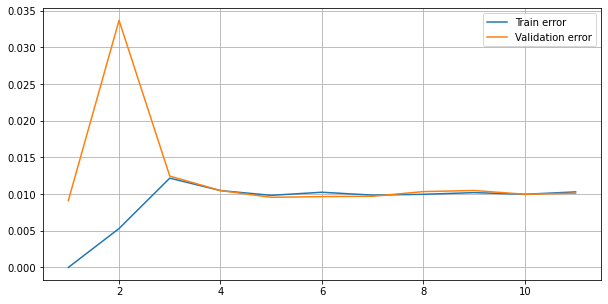

In [14]:
b = l2_loss_train_list
c = l2_loss_val_list
a = [1,2,3,4,5,6,7,8,9,10,11] # It is the index of number_of_datas list
plt.plot(a,b,label = 'Train error')
plt.plot(a,c,label = 'Validation error')
plt.legend()
plt.grid(True)
plt.show()

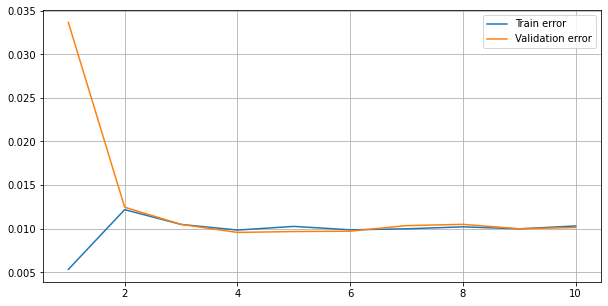

In [15]:
# Plotting the errors after deleting the 'overfitted' condition (which is n=10)
# Since the first error is quite high, other errors can not be determined easily
b_2 = l2_loss_train_list[1:]
c_2 = l2_loss_val_list[1:]
a_2 = [1,2,3,4,5,6,7,8,9,10]
plt.plot(a_2,b_2,label = 'Train error')
plt.plot(a_2,c_2,label = 'Validation error')
plt.legend()
plt.grid(True)
plt.show()

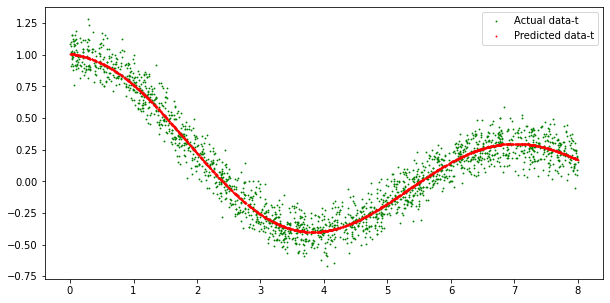

In [16]:
# This is for the case of n = 10^4
plt.scatter(x_test,y_test,label="Actual data-t",color='green',s=0.7)
plt.scatter(x_test,y_pred_val,label="Predicted data-t",color='red',s=0.8)
plt.legend()

# Ridge Regression/Regularization

In [17]:
from sklearn import preprocessing
l2_loss_train_list = []
l2_loss_val_list = []
for number in number_of_datas:
    print(number)
    model = Ridge(alpha=0.01)
    sub_list_x = []
    sub_list_y = []
    for _ in range(number):
        noise=random.gauss(mean,std)/10
        random_choice_interval = np.random.choice(interval,1)
        sub_list_x.append(random_choice_interval)
        index = np.where(interval==random_choice_interval)
        sub_list_y.append(jn_0[index]+noise)
    x_train,y_train,x_test,y_test = train_test_split(sub_list_x,sub_list_y,0.8)
    scaler = preprocessing.StandardScaler()
    scaler.fit(x_train)
    x_train_std = scaler.transform(x_train)
    x_test_std = scaler.transform(x_test)
    polf = PolynomialFeatures(8)
    x_pol = polf.fit_transform(x_train_std)
    model.fit(x_pol,y_train)
    y_pred_train = model.predict(polf.fit_transform(x_train_std))
    y_pred_val = model.predict(polf.fit_transform(x_test_std))
    l2_loss_train = l2_loss(y_train,y_pred_train,len(y_train))
    l2_loss_val = l2_loss(y_test,y_pred_val,len(y_test))
    l2_loss_train_list.append(l2_loss_train)
    l2_loss_val_list.append(l2_loss_val)

10
20
100
1000
2000
3000
4000
5000
7500
9000
10000


In [18]:
for i in range(len(number_of_datas)):
    print('L2 loss of training set with {} datas is: '.format(number_of_datas[i]),l2_loss_train_list[i] )

L2 loss of training set with 10 datas is:  0.0004582075270132211
L2 loss of training set with 20 datas is:  0.004281731740387873
L2 loss of training set with 100 datas is:  0.009665067709534023
L2 loss of training set with 1000 datas is:  0.009676106055324884
L2 loss of training set with 2000 datas is:  0.010236622541018288
L2 loss of training set with 3000 datas is:  0.010013103793471348
L2 loss of training set with 4000 datas is:  0.009756369675669563
L2 loss of training set with 5000 datas is:  0.010161024676084884
L2 loss of training set with 7500 datas is:  0.00960954886083811
L2 loss of training set with 9000 datas is:  0.009796310438424183
L2 loss of training set with 10000 datas is:  0.010110482766497526


In [19]:
for i in range(len(number_of_datas)):
    print('L2 loss of test set with {} datas is: '.format(number_of_datas[i]),l2_loss_val_list[i] )

L2 loss of test set with 10 datas is:  6.604134115730325
L2 loss of test set with 20 datas is:  0.20501634772772012
L2 loss of test set with 100 datas is:  0.02312406448226511
L2 loss of test set with 1000 datas is:  0.009954763542209253
L2 loss of test set with 2000 datas is:  0.009565337423436827
L2 loss of test set with 3000 datas is:  0.00978404804493433
L2 loss of test set with 4000 datas is:  0.010161700462199401
L2 loss of test set with 5000 datas is:  0.008908755905916698
L2 loss of test set with 7500 datas is:  0.010371214523894433
L2 loss of test set with 9000 datas is:  0.009934990478390165
L2 loss of test set with 10000 datas is:  0.010005322301563261


In [20]:
d = l2_loss_train_list[1:]
e = l2_loss_val_list[1:]
f = [1,2,3,4,5,6,7,8,9,10]
# Notice that, n=10 has quite high error.

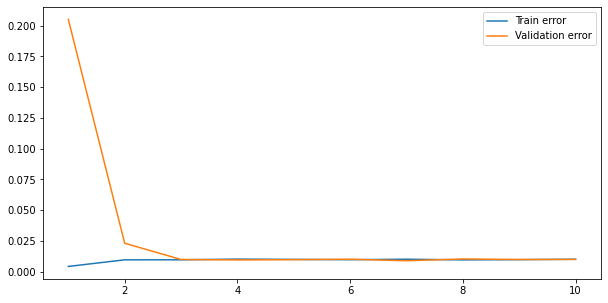

In [21]:
plt.plot(f,d,label = 'Train error')
plt.plot(f,e,label = 'Validation error')
plt.legend()
plt.show()

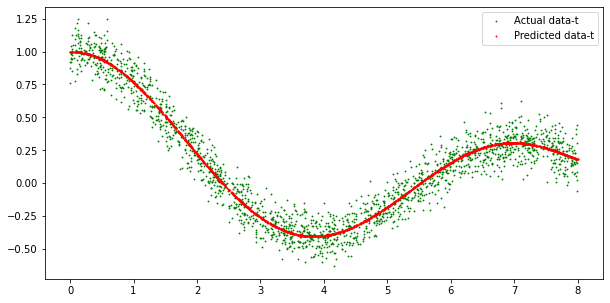

In [22]:
plt.scatter(x_test,y_test,label="Actual data-t",color='green',s=0.7)
plt.scatter(x_test,y_pred_val,label="Predicted data-t",color='red',s=0.8)
plt.legend()

In [23]:
# It is seen that, in each regression, we have very close model to the Bessel function without noise.